# Arc Length

Given a curve $y = f(x)$ from $x = a$ to $x = b$, we want to find the arc length.

**Example 1**: Find the arc length of $y = 3x - 2$ from $x = 2$ to $x = 4$.

**Answer**: If we plot this curve, we get

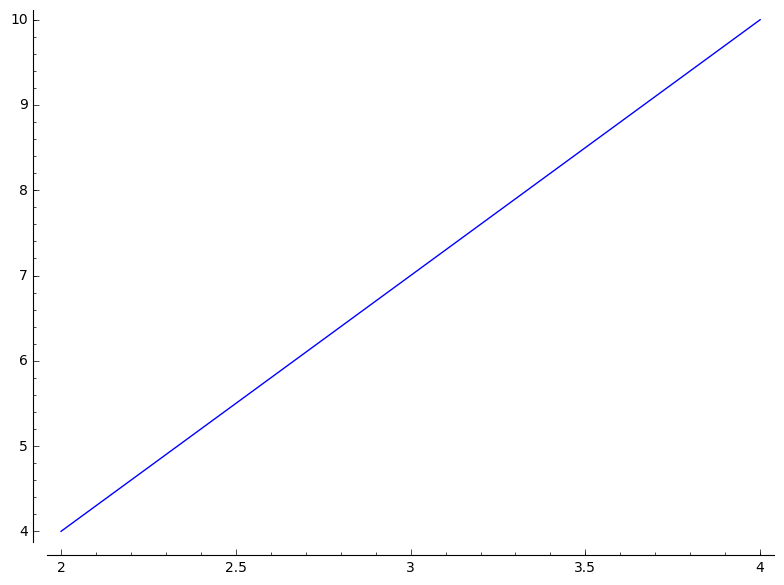

In [1]:
%display latex
f(x) = 3*x - 2
p = plot(f(x), xmin = 2, xmax = 4)
p.show()

The length of this line segment is the distance between $(2, 4)$ and $(4, 10)$. By the Pythagorean theorem, distance is
$$d = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}.$$

In [3]:
%display latex
# complete the code below to find the length of the line segment
sqrt( (4 - 2)^2 + (10 - 4)^2 )

2*sqrt(10)

So the arc length of $y = 3x - 2$ from $x = 2$ to $x = 4$ is $2\sqrt{10}$.

Finding arc lengths of nonlinear curves is more difficult. But we can try to *approximate* the arc length using line segments.

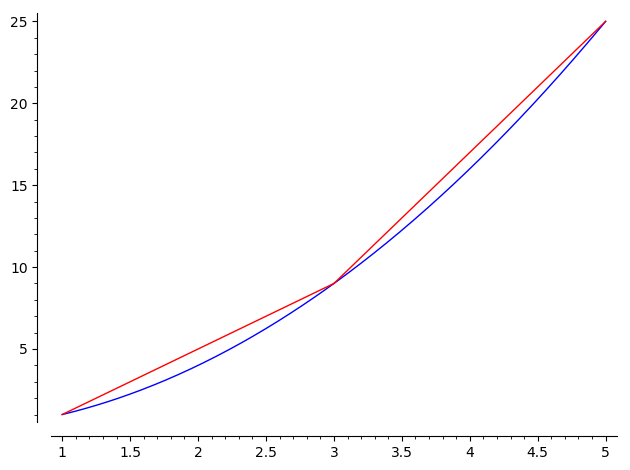

In [5]:
f(x) = x^2

p = plot(f(x), xmin = 1, xmax = 5)
delta_x = 2 # width of each line segment

for i in srange(1, 5, step = delta_x):
    p = p + line([(i,f(i)),(i + delta_x, f(i + delta_x))], color='red')
p.show()

**Example 2**: Estimate the arc length of $f(x) = x^{2}$ from $x = 1$ to $x = 5$ by finding the lengths of the line segments. Is this estimate an underestimate or an overestimate?

In [6]:
# complete the code below to get length estimate
sqrt( (3 - 1)^2 + (f(3) - f(1))^2 ) + sqrt( (5 - 3)^2 + (f(5) - f(3))^2)

2*sqrt(65) + 2*sqrt(17)

How can we make the approximation more exact?

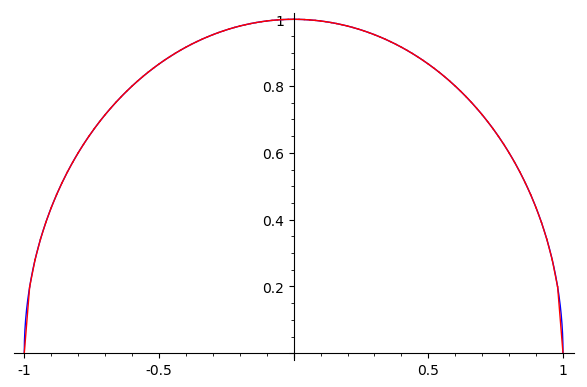

3.14076058984246

In [12]:
def dist(x1, y1, x2, y2):
    """
    Computes distance between (x1,y1) and (x2, y2) using Pythagorean theorem.
    Useful for estimating arc lengths.
    """
    distance = sqrt( (x2 - x1)^2 + (y2 - y1)^2 )
    return distance

f(x) = sqrt(1 - x^2)
a = -1
b = 1
num_of_lines = 100
delta_x = (b - a) / num_of_lines # width of each line segment

p = plot(f(x), xmin = a, xmax = b) # initial plot
length = 0 # starting length
 
for i in srange(a, b, step = delta_x):
    p = p + line([(i,f(i)),(i + delta_x, f(i + delta_x))], color='red') # add line segments to graph of f(x)
    length = length + dist(i, f(i), i + delta_x, f(i + delta_x))
p.show()

length.n() # estimate of length

In [13]:
# this cell contains useful code for Example 3
# be sure to evaluate this cell before using any of the below commands!

def arc_length_approx(f, a, b, n):
    """
    Estimates arc length of function f from x = a to x = b using n line segments.
    """
    delta_x = (b - a) / n
    length = sum([dist(i, f(i), i + delta_x, f(i + delta_x)) for i in srange(a, b, step = delta_x)])
    return length

def plot_arc_length_approx(f, a, b, n):
    """
    Plots line segments used to approximate a curve in order to estimate arc length.
    """
    delta_x = (b - a) / n
    p = plot(f(x), xmin = a, xmax = b)
    for i in srange(a, b, step = delta_x):
        p = p + line([(i,f(i)),(i + delta_x, f(i + delta_x))], color='red') # add line segments to graph of f(x)
    p.show(aspect_ratio = 1) # sets x and y axes to same scale

**Example 3**: Using previous code, estimate the following arc lengths using $n = 5$. Use `plot_arc_length_approx` to determine if you're estimate is reasonable.
  1. $f_{1}(x) = \sin x$ for $0\leq x\leq \pi$.
  2. $f_{2}(x) = e^{x}$ for $0\leq x\leq 1$.
  3. $f_{3}(x) = \sqrt{1 - x^{2}}$ for $-1\leq x\leq 1$.

In [0]:
# code cell for Example 3

If we let the number of line segments increase without bound, our approximations become exact and turn into integrals:

$$L = \int_{a}^{b} \sqrt{1 + f'(x)^{2}}\,dx.$$

**Example 4**: The arc length of $y = x^{2}$ from $x = 1$ to $x = 5$ is
$$\int_{1}^{5}\sqrt{1 + 4x^{2}}\,dx.$$

In [14]:
# code cell for Example 4
integral(sqrt(1 + derivative(x^2)^2), x, 1, 5)

5/2*sqrt(101) - 1/2*sqrt(5) + 1/4*arcsinh(10) - 1/4*arcsinh(2)

**Example 5**: Modify the code in Example 4 to find the arc length of $y = \sqrt{1 - x^{2}}$ from $x = -1$ to $x = 1$. You may use the fact that
$$\sqrt{1 + (y')^{2}} = \frac{1}{\sqrt{1 - x^{2}}}$$
to help Sage deal with the resulting integral.

In [15]:
# code cell for Example 5
integral(1 / sqrt(1 - x^2), x, -1, 1)

pi

Another approach to finding arc lengths is by using "staircases":

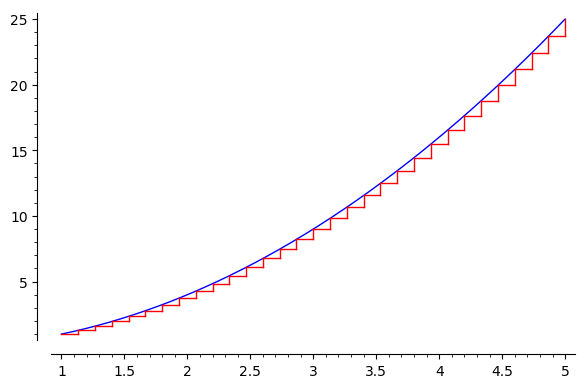

In [17]:
f(x) = x^2
a = 1
b = 5
n = 30
delta_x = (b - a) / n
p = plot(f(x), xmin = a, xmax = b)
for i in srange(a, b, step = delta_x):
    p = p + line([(i,f(i)), (i + delta_x, f(i))], color='red') + line([(i + delta_x, f(i)), (i + delta_x, f(i + delta_x))], color='red') # add line segments to graph of f(x)
p.show()

**Example 6**: Explain why this is **not** a good method to estimate the arc length.